The objective os this file is to plot the points that we study in our model and how many of these points correspond to each area. This is done to check if there are areas that we do not need to use

In [ ]:
#Import libraries
from scipy.io import loadmat
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

Primero creamos un mapa con todas las posiciones

We try to create the map with the data from 'Point_ages...'. We select the latitudinal and longitudinal values of all the points in this datafile. We convert it as a Geodataframe and Plot it.

In [ ]:
#Charge the data 
data_point_ages=loadmat('Point_ages_xyzKocsisScotese_400')

#Select the shelf_lonlatAge
shelf_lonlatAge=data_point_ages['shelf_lonlatAge']

In [ ]:
#Select the latitudinal and longitudinal coordinates of all the points

lat=shelf_lonlatAge[:,shelf_lonlatAge.shape[1]-1,1]#
lon=shelf_lonlatAge[:,shelf_lonlatAge.shape[1]-1,0]#

In [ ]:
#Convert the lat and lon to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in zip(lon, lat)],
    crs='EPSG:4326'
)

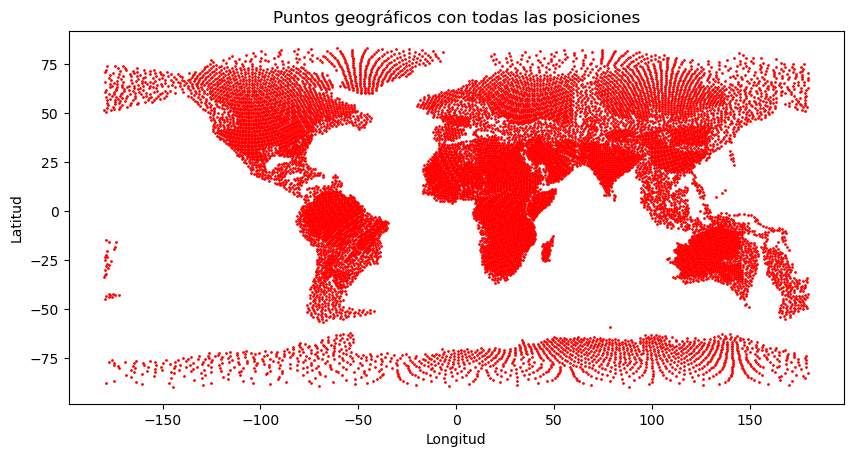

In [ ]:
#Plot it

gdf.plot(
    figsize=(10, 6),
    color='red',
    markersize=1
)

plt.title("Puntos geográficos con todas las posiciones")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In the previous map we can see that the points are around all the continent. This does not have any sense. In order to correct this mistake we select only the points that have a diversity value (this is done using the gridMean function)
We do the same procedure as before with this new points.

In [2]:
#We load the data with the restricted points
data=np.load("posiciones_restringidas.npz")

In [3]:
#We select the latitudinal and longitudinal coordinates of all the points
lat=data['lat']
lon=data['lon']

In [4]:
#We convert the lat and lon to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in zip(lon, lat)],
    crs='EPSG:4326'
)

In [5]:
#We check if we have done it correctly
gdf

,geometry
0,POINT (144.47647 -10.56392)
1,POINT (146.08323 -9.83425)
2,POINT (147.08795 -10.68396)
3,POINT (143.55779 -10.41095)
4,POINT (144.34149 -11.47048)
...,...
3517,POINT (111.00808 -7.36919)
3518,POINT (168.60782 -28.55769)
3519,POINT (171.41854 -28.57977)
3520,POINT (-54.92934 -49.41033)


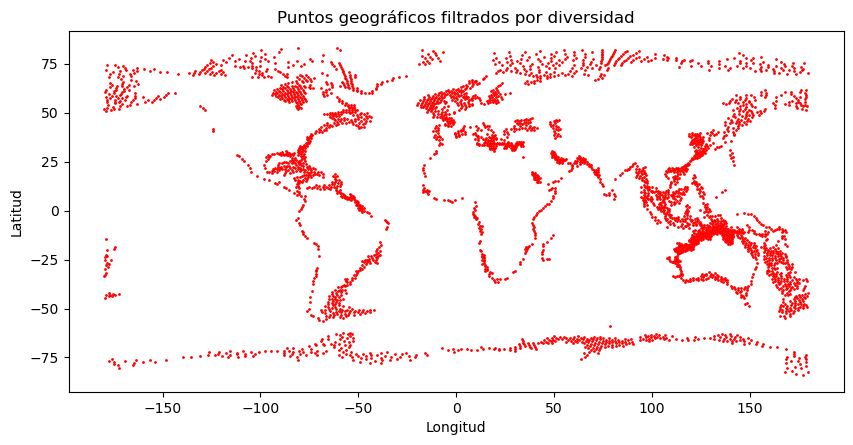

In [6]:
#We plot it
gdf.plot(
    figsize=(10, 6),
    color='red',
    markersize=1
)

plt.title("Puntos geográficos filtrados por diversidad")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

We analyze the change between this map and the map with the LSOmask filter

In [3]:
#We load the data with the restricted points
data=np.load("posiciones_restringidas_LSOmask.npz")

In [5]:
#We select the latitudinal and longitudinal coordinates of all the points
lat=data['lat']
lon=data['lon']
D=data['D']

In [9]:
len(D[np.isnan(D)==0])

2978

In [7]:
#We convert the lat and lon to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in zip(lon, lat)],
    crs='EPSG:4326'
)

In [11]:
gdf['D']=D[np.isnan(D)==0]

In [8]:
gdf

,geometry
0,POINT (144.47647 -10.56392)
1,POINT (146.08323 -9.83425)
2,POINT (147.08795 -10.68396)
3,POINT (143.55779 -10.41095)
4,POINT (144.34149 -11.47048)
...,...
3517,POINT (111.00808 -7.36919)
3518,POINT (168.60782 -28.55769)
3519,POINT (171.41854 -28.57977)
3520,POINT (-54.92934 -49.41033)


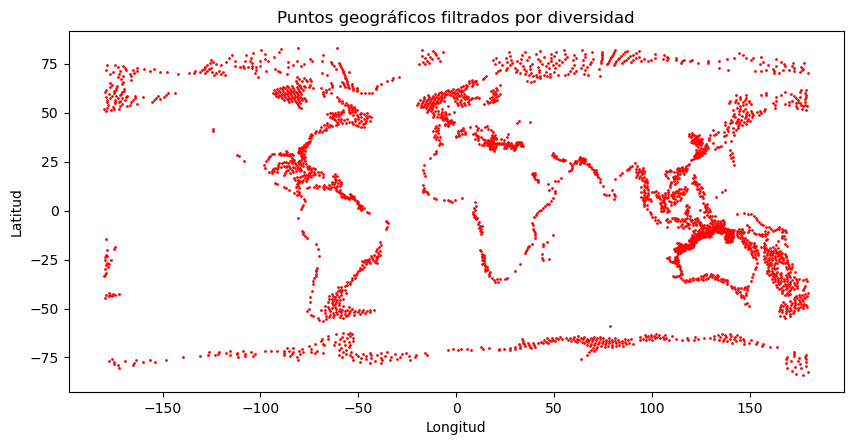

In [13]:
#We plot it
gdf.plot(
    figsize=(10, 6),
    color='red',
    markersize=1
)

plt.title("Puntos geográficos filtrados por diversidad")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Here, we can see that the points are around the continents, in the shelf areas. This has more sense.  
Now, we have to see how many points are into each of the 66 zones of the lme66 file.

In [39]:
#We charge the geodataframe with the polygons

shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\nuevas_areas_index.shp')

# We assure that the shapefile has the same coordinate system as the points
shapefile = shapefile.set_crs(epsg=4326)

#We identify each point with the region of the shapefile
gdf_resultado = gpd.sjoin(gdf, shapefile, how='left', predicate='intersects')

We realize that we have make a mistake, there are some points that have the same latitude and longitude, we are going to correct this mistake

In [42]:
duplicados = gdf_resultado.index.value_counts()
puntos_duplicados = duplicados[duplicados > 1]
#print(f"Puntos con múltiples intersecciones: {len(puntos_duplicados)}")

In [46]:
len(gdf)

3522

In [47]:
len(lat)

3522

In [48]:
gdf_resultado

,geometry,index_right,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area
0,POINT (144.47647 -10.56392),34.0,34.0,40.0,Northeast Australian Shelf,71.035995,109.050873
1,POINT (146.08323 -9.83425),NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (147.08795 -10.68396),NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (143.55779 -10.41095),34.0,34.0,40.0,Northeast Australian Shelf,71.035995,109.050873
4,POINT (144.34149 -11.47048),34.0,34.0,40.0,Northeast Australian Shelf,71.035995,109.050873
...,...,...,...,...,...,...,...
3517,POINT (111.00808 -7.36919),NaN,NaN,NaN,NaN,NaN,NaN
3518,POINT (168.60782 -28.55769),NaN,NaN,NaN,NaN,NaN,NaN
3519,POINT (171.41854 -28.57977),NaN,NaN,NaN,NaN,NaN,NaN
3520,POINT (-54.92934 -49.41033),NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#We check if we have done it correctly
gdf_ordenado=gdf_resultado[gdf_resultado['OBJECTID'].notna()]

In [12]:
gdf_ordenado

,geometry,index_right,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area
0,POINT (144.47647 -10.56392),38.0,39.0,40.0,Northeast Australian Shelf,71.035995,109.050873
3,POINT (143.55779 -10.41095),38.0,39.0,40.0,Northeast Australian Shelf,71.035995,109.050873
4,POINT (144.34149 -11.47048),38.0,39.0,40.0,Northeast Australian Shelf,71.035995,109.050873
6,POINT (119.09312 38.97942),15.0,16.0,48.0,Yellow Sea,78.792384,44.313249
7,POINT (120.59148 39.59968),15.0,16.0,48.0,Yellow Sea,78.792384,44.313249
...,...,...,...,...,...,...,...
3508,POINT (94.20617 9.66945),26.0,27.0,34.0,Bay of Bengal,219.637122,304.148625
3511,POINT (111.08818 4.57634),25.0,26.0,36.0,South China Sea,205.956315,264.397357
3512,POINT (125.84705 3.77348),28.0,29.0,37.0,Sulu-Celebes Sea,156.109846,82.971989
3513,POINT (127.98318 -2.21646),33.0,34.0,38.0,Indonesian Sea,284.654573,184.897965


In [14]:
#We can check if a point is inside a polygon using this code
punto = Point(144.47647, -10.56392)
poligono = shapefile.loc[shapefile['OBJECTID'] == 39].geometry.values[0]

print(poligono.contains(punto)) 

True


Now, we are going to create a dataframe with the points and it corresponded area

In [ ]:
#We select just the column 'geometry', with the points, and the 'OBJECTID' column, with the area
puntos_region=gdf_resultado[['geometry','OBJECTID']]

#We save it in a csv file
puntos_region.to_csv('puntos_region.csv')

Now, we have to count how many points are inside each region

In [ ]:
#We create the vector with the number of observations per point
num_obs = gdf_ordenado.groupby('OBJECTID')['num_observaciones'].first().reset_index()

In [21]:
num_obs.head(30)

,OBJECTID,num_observaciones
0,1.0,22
1,2.0,65
2,3.0,45
3,4.0,6
4,5.0,55
5,6.0,49
6,7.0,20
7,8.0,7
8,9.0,17
9,10.0,1


We merge the vector with the quantity of points in each area with the shapefile, to plot it

In [ ]:
#We replace the vector with the shapefile
shapefile_combined = shapefile.merge(num_obs, left_on='OBJECTID', right_on='OBJECTID', how='left')

In [ ]:
#If there are any column with no observations, NaN values, we replace them with 0
shapefile_combined["num_observaciones"]=shapefile_combined["num_observaciones"].replace(np.nan, 0)

Index(['OBJECTID', 'LME_NUMBER', 'LME_NAME', 'Shape_Leng', 'Shape_Area',
       'geometry', 'num_points'],
      dtype='object')


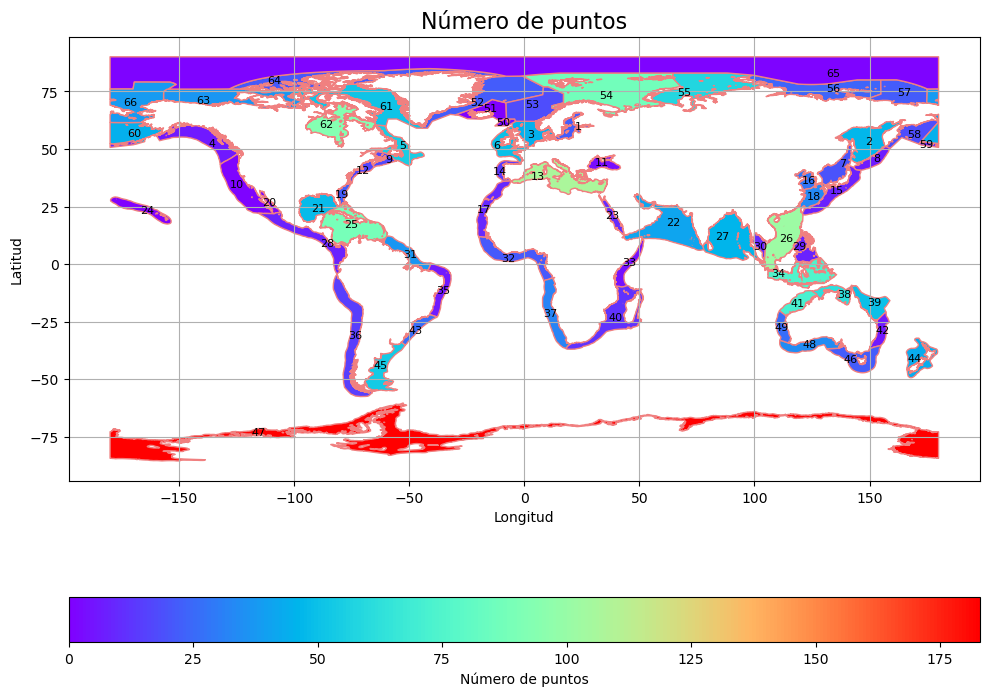

In [35]:
# Crear figura y eje para el mapa
fig, ax = plt.subplots(figsize=(10, 8))

# Colorear las regiones según el valor de 'genusid'
shapefile_combined.plot(column='num_points', ax=ax, legend=True,
              legend_kwds={'label': "Número de puntos",
                           'orientation': "horizontal"},
              cmap='rainbow',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral')

# Verificar las columnas disponibles
print(shapefile_combined.columns)

# Agregar etiquetas en puntos representativos dentro de cada polígono
for idx, row in shapefile_combined.iterrows():
    # Obtener un punto representativo dentro del polígono
    representative_point = row.geometry.representative_point()
    
    # Agregar etiqueta en ese punto
    ax.text(representative_point.x, representative_point.y, 
            str(row["OBJECTID"]),  # Aquí estamos usando 'OBJECTID'
            fontsize=8, ha='center', va='center', color='black')

# Título y etiquetas
ax.set_title("Número de puntos", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

There are a lot of points in Antartida, so we cannot see the map correctly. For a better analysis we drop this row

In [15]:
shapefile_antartida = shapefile_combined.drop(
    shapefile_combined[shapefile_combined['OBJECTID'] == 47].index
)

In [19]:
shapefile_combined["num_observaciones"]=shapefile_combined["num_observaciones"].astype(int)

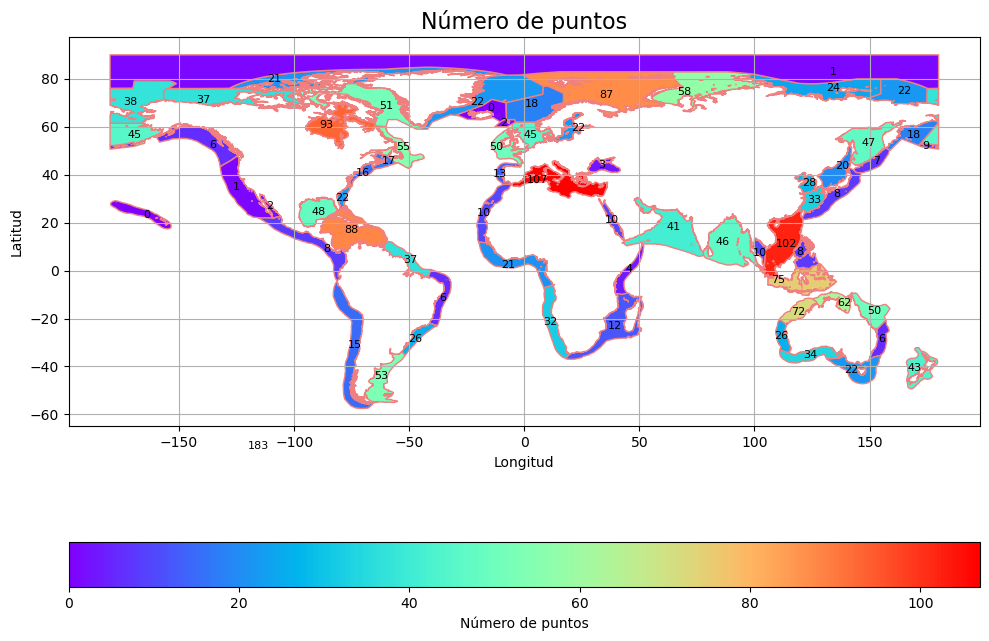

In [20]:
# Crear figura y eje para el mapa
fig, ax = plt.subplots(figsize=(10, 8))

# Colorear las regiones según el valor de 'genusid'
shapefile_antartida.plot(column='num_observaciones', ax=ax, legend=True,
              legend_kwds={'label': "Número de puntos",
                           'orientation': "horizontal"},
              cmap='rainbow',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral')

# Agregar etiquetas en puntos representativos dentro de cada polígono
for idx, row in shapefile_combined.iterrows():
    # Obtener un punto representativo dentro del polígono
    representative_point = row.geometry.representative_point()
    
    # Agregar etiqueta en ese punto
    ax.text(representative_point.x, representative_point.y, 
            str(row["num_observaciones"]),  # Aquí estamos usando 'OBJECTID'
            fontsize=8, ha='center', va='center', color='black')

# Título y etiquetas
ax.set_title("Número de puntos", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [54]:
shapefile_combined[["LME_NAME","num_points","OBJECTID"]][shapefile_combined['num_points'] < 10]

,LME_NAME,num_points,OBJECTID
3,Gulf of Alaska,6.0,4
7,Oyashio Current,7.0,8
9,California Current,1.0,10
10,Black Sea,3.0,11
14,Kuroshio Current,8.0,15
19,Gulf of California,2.0,20
23,Insular Pacific-Hawaiian,0.0,24
27,Pacific Central-American Coastal,8.0,28
28,Sulu-Celebes Sea,8.0,29
32,Somali Coastal Current,4.0,33


In [52]:
shapefile_combined[["num_points","OBJECTID"]][shapefile_combined['OBJECTID'].isin([65, 64, 56, 57, 41,49,48,38, 58, 2, 45, 23])]

,num_points,OBJECTID
1,47.0,2
22,10.0,23
37,62.0,38
40,72.0,41
44,53.0,45
47,34.0,48
48,26.0,49
55,24.0,56
56,22.0,57
57,18.0,58


In [55]:
num_puntos=shapefile_combined[["LME_NAME","num_points","OBJECTID"]]

In [56]:
num_puntos.to_csv("num_puntos.csv", index=False)